# [Intermediate earth data science textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/)
## Use Data for Earth and Environmental Science in Open Source Python
Tutorial Author: Earth Lab CU Boulder <br>
Name: Geoff Tam <br>
Date Created: 09-01-2022 <br>

## [Section 1. Time Series Data in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/spatial-data-applications/) 

### Chapter 1. Time Series Data in Python

#### [Lesson 1. Work With Datetime Format in Python - Time Series Data](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/)

In [1]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Set working directory
path = os.getcwd()
os.chdir(os.path.join(path, 'data'))

In [3]:
# Download data
data = et.data.get_data('colorado-flood')

Extracted output to C:\Users\geoff\earth-analytics\data\colorado-flood\.


In [4]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


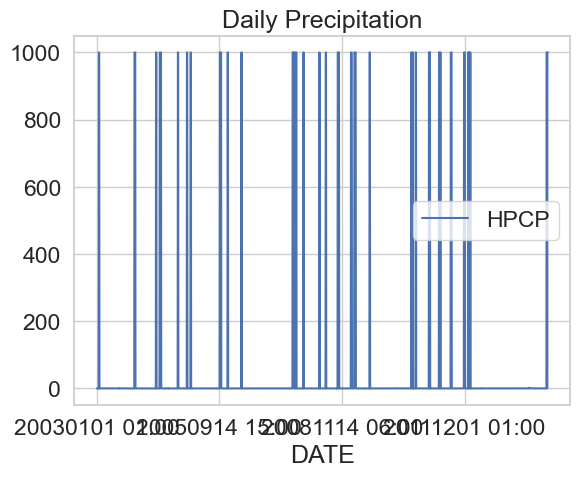

In [5]:

boulder_precip_2003_2013.plot(x='DATE', y = 'HPCP', title = 'Daily Precipitation')

plt.show()

In [6]:
# Data exploration
boulder_precip_2003_2013['HPCP'].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [7]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

The data have a weird 999 na value and date times are read as objects. 

In [8]:
# Read in data again with fixed formatting 
boulder_precip_2003_2013 = pd.read_csv(file_path,
parse_dates = ['DATE'],
index_col = ['DATE'],
na_values=['999.99']
)

# View data
boulder_precip_2003_2013

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,


In [9]:
# View summary stats
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [10]:
# View index
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [11]:
# If you want to reset DATE as a normal column
# boulder_precip_2003_2013.reset_index()

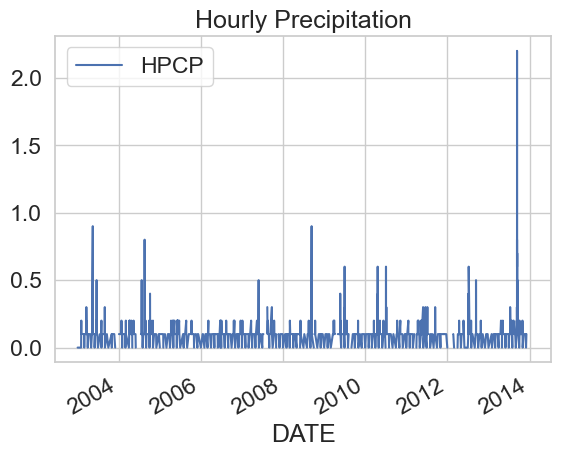

In [12]:
boulder_precip_2003_2013.plot(y = 'HPCP', title = 'Hourly Precipitation')

plt.show()

In [13]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [14]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()
precip_2005_clean

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2005-12-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-12-03 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-12-06 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


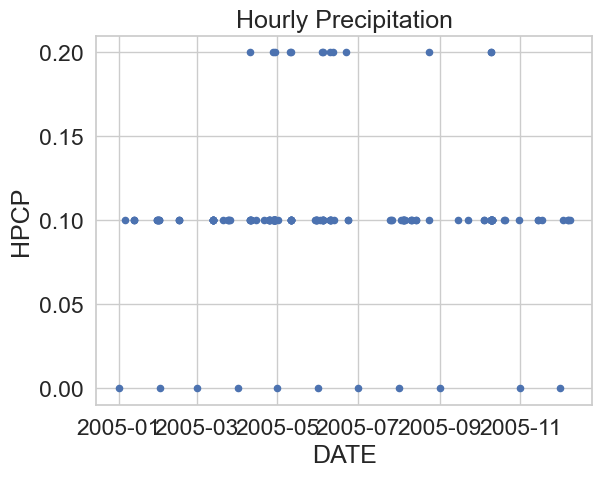

In [15]:
# Plot the data in pandas
precip_2005_clean.reset_index().plot(x = 'DATE', y = 'HPCP', title = 'Hourly Precipitation', kind = 'scatter')

plt.show()

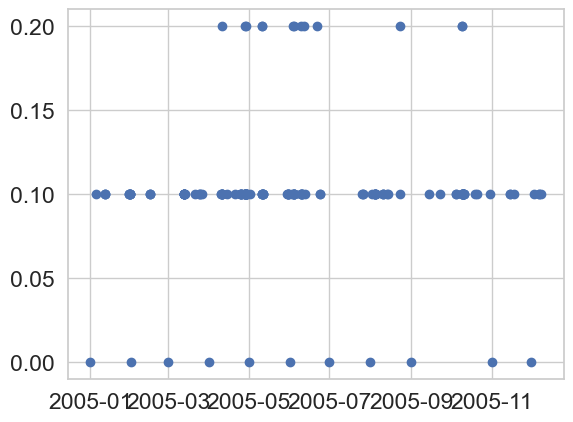

In [16]:
# PLot data with matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean['HPCP'])
plt.show()

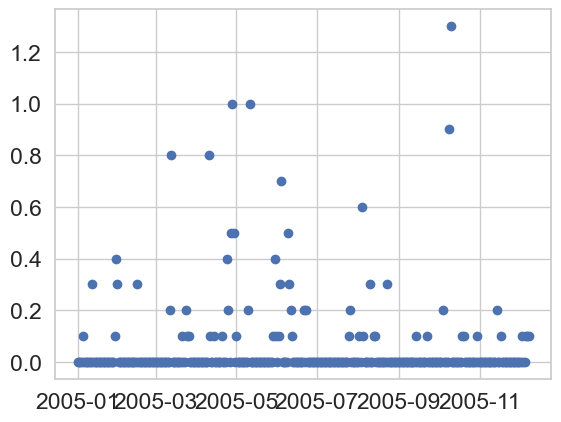

In [17]:
# Resample the data to a different time frame (daily)
precip_2005_daily = precip_2005_clean.resample('D').sum()
# Plot the data in matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily['HPCP'])

plt.show()

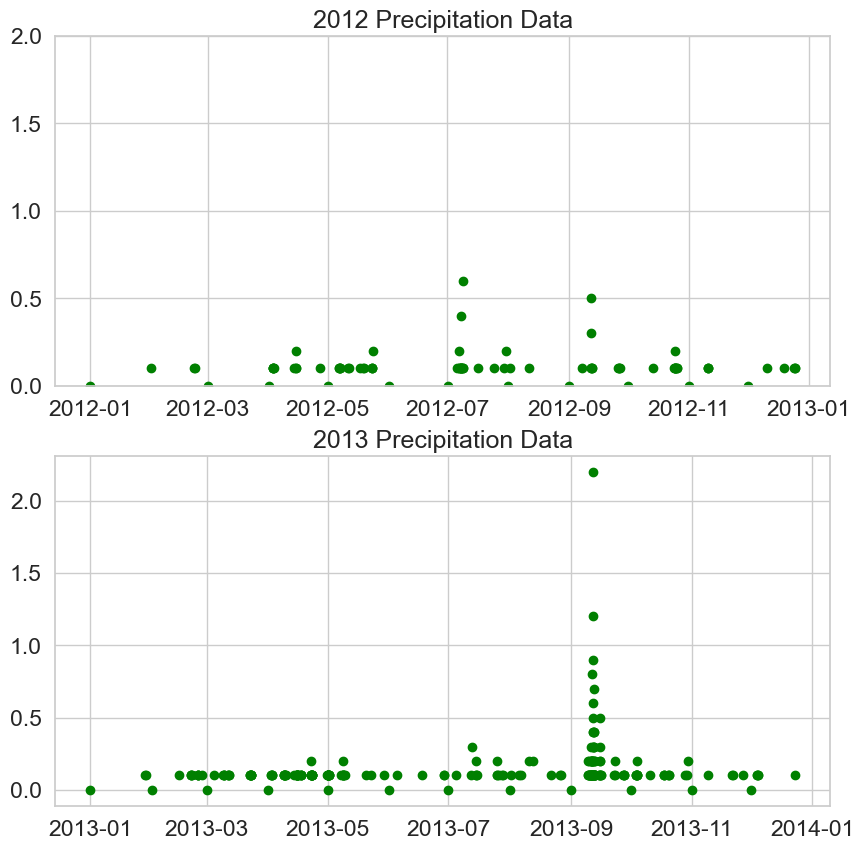

In [35]:
# Plot 2012 and 2013 on the same plot
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

# Subset data from 2012 and 2013
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()

ax1.scatter(x=precip_2012.index.values,
           y=precip_2012['HPCP'],
           color = "green")
ax2.scatter(x=precip_2013.index.values,
            y=precip_2013['HPCP'],
            color = "green")
ax1.set(title="2012 Precipitation Data")
ax2.set(title='2013 Precipitation Data')
ax1.set(ylim=[0,2])
plt.show()

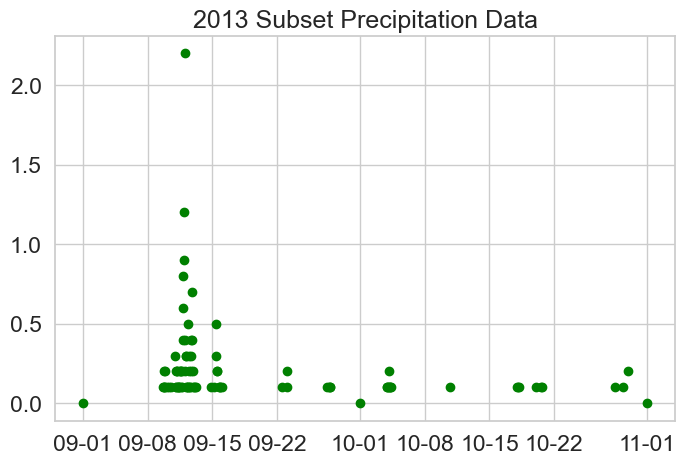

In [41]:
from matplotlib.dates import DateFormatter
# Plot subset of dates
f, (ax) = plt.subplots(figsize=(8,5))

# Subset data from 2012 and 2013
precip_2013_subset = boulder_precip_2003_2013['2013-09-01':'2013-11-01'].dropna()

ax.scatter(x=precip_2013_subset.index.values,
           y=precip_2013_subset['HPCP'],
           color = "green")

ax.set(title="2013 Subset Precipitation Data")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()